# In the name of god 
## Hands on Biological Signal Processing - Part 1 

### 1) Effect of Altitude on Human EEG and ECG Signals

Experiment Overview:
The experiment aims to investigate the effects of altitude on human EEG (Electroencephalography) and ECG (Electrocardiography) signals. Two altitudes were chosen for the study: 990 meters and 2700 meters above sea level. During signal recording, a person was exposed to a flashing light stimulus. If the light was red, no reaction was required, but if it was green, the person had to press a button using their right index finger.

Data Collection:
Signals were recorded using electrodes placed at specific positions on the scalp according to the standard 10/20 system for EEG measurement. Specifically, signals were recorded from electrodes 3C and 4C. Additionally, ECG signals were recorded along with information about the flashing light stimulus and the person's button presses.

Data Structure:
Two separate databases were created, each corresponding to one of the altitudes tested. Each database contains multiple trials, with each trial having recordings from five channels: EEG signals from electrodes 3C and 4C (channels 1 and 2), ECG signal (channel 3), flashing light stimulus (channel 4), and button presses (channel 5). The units for EEG signals are microvolts, and the sampling frequency is 256 Hz.

In [2]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl


# Set LaTeX font for all text
mpl.rc('font', family='serif')   # Set serif font
# Set grid properties for all plots
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.alpha'] = 0.8
mpl.rcParams['grid.color'] = 'gray'



In [4]:

# Load data from the .mat file
data_990  = loadmat('EEG_990mS16.mat') 
data_2700 = loadmat('EEG_2700mS16.mat')

In [5]:
type (data_990)

dict

In [6]:
data_990.keys()

dict_keys(['__header__', '__version__', '__globals__', 'y'])

In [7]:
for i in data_990.keys():
    print (np.shape(data_990[i]))

()
()
(0,)
(37, 1536, 5)


In [8]:
Data_channel_names = ['EEG_C3','EEG_C4','ECG','Light_Stimulus','Button_Presses']

In [9]:
# create varibles from datas
for i, channel_name in enumerate(Data_channel_names):
    print (i,channel_name)
    globals()[f"{channel_name}_990"] = data_990['y'][:,:,i]
    globals()[f"{channel_name}_2700"] = data_2700['y'][:,:,i]


0 EEG_C3
1 EEG_C4
2 ECG
3 Light_Stimulus
4 Button_Presses


In [10]:
print (globals().keys())
# so varibles are = 'EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_stimulus_990', 'Light_stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700'

dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'spectrogram', 'alpha_band_freq_range', '_i2', 'np', 'plt', 'loadmat', '_i3', 'mpl', '_i4', 'data_990', 'data_2700', '_i5', '_5', '_i6', '_6', '_i7', 'i', '_i8', 'Data_channel_names', '_i9', 'channel_name', 'EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_Stimulus_990', 'Light_Stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700', '_i10'])


In [11]:
varible_names = ['EEG_C3_990', 'EEG_C3_2700', 'EEG_C4_990', 'EEG_C4_2700', 'ECG_990', 'ECG_2700', 'Light_Stimulus_990', 'Light_Stimulus_2700', 'Button_Presses_990', 'Button_Presses_2700']
for i in varible_names : 
    print ('shape of the variable',i,'is',np.shape (globals()[i]))



shape of the variable EEG_C3_990 is (37, 1536)
shape of the variable EEG_C3_2700 is (41, 1536)
shape of the variable EEG_C4_990 is (37, 1536)
shape of the variable EEG_C4_2700 is (41, 1536)
shape of the variable ECG_990 is (37, 1536)
shape of the variable ECG_2700 is (41, 1536)
shape of the variable Light_Stimulus_990 is (37, 1536)
shape of the variable Light_Stimulus_2700 is (41, 1536)
shape of the variable Button_Presses_990 is (37, 1536)
shape of the variable Button_Presses_2700 is (41, 1536)


In [12]:
# Number of trials
num_trials_990 = 37
num_trials_2700 = 41

# Generate random indices
random_index_990 = np.random.randint(0, num_trials_990)
random_index_2700 = np.random.randint(0, num_trials_2700)

# Print random indices
print("Random index for altitude 990:", random_index_990)
print("Random index for altitude 2700:", random_index_2700)


Random index for altitude 990: 34
Random index for altitude 2700: 16


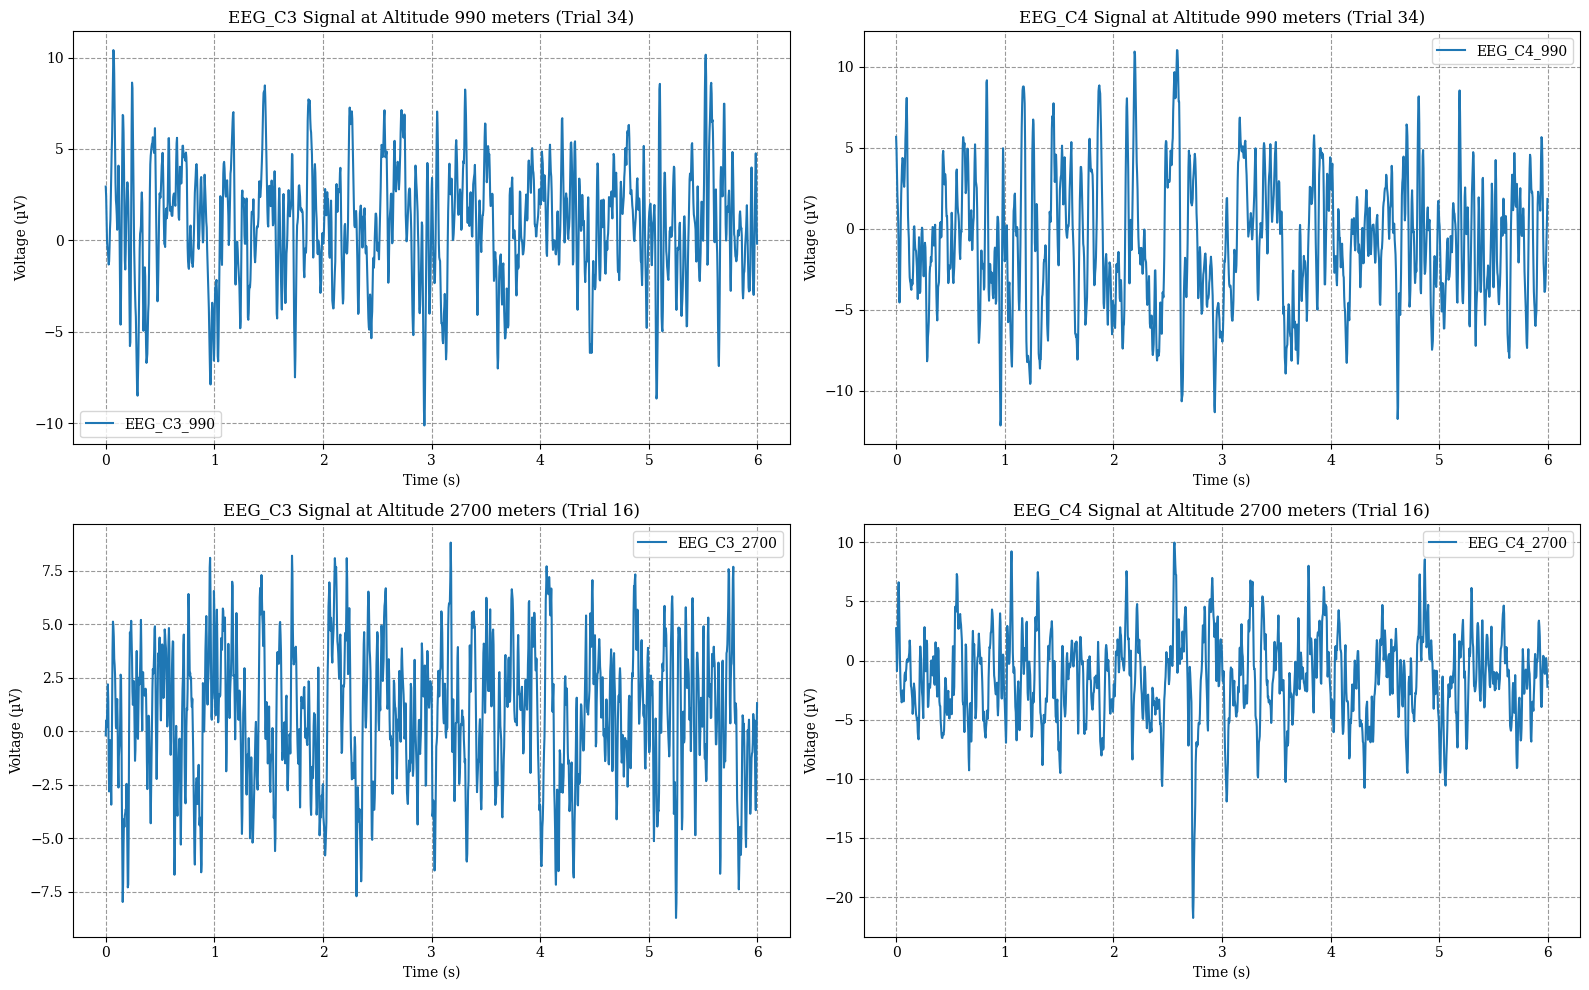

In [13]:
# Sampling frequency (Fs)
Fs = 256

# Number of samples per trial
num_samples = EEG_C3_990.shape[1]  # Assuming all trials have the same number of samples

# Create time vector
time = np.arange(num_samples) / Fs

# Plot EEG signals for randomly selected trials at each altitude
plt.figure(figsize=(16, 10))

# EEG signal for altitude 990 meters
plt.subplot(2, 2, 1)
plt.plot(time, EEG_C3_990[random_index_990], label='EEG_C3_990')
plt.title('EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time, EEG_C4_990[random_index_990], label='EEG_C4_990')
plt.title('EEG_C4 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

# EEG signal for altitude 2700 meters
plt.subplot(2, 2, 3)
plt.plot(time, EEG_C3_2700[random_index_2700], label='EEG_C3_2700')
plt.title('EEG_C3 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time, EEG_C4_2700[random_index_2700], label='EEG_C4_2700')
plt.title('EEG_C4 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Time (s)')
plt.ylabel('Voltage (µV)')
plt.legend()

plt.tight_layout()
plt.show()


In [14]:
# Compute FFT for EEG signals
fft_EEG_C3_990 = np.fft.fft(EEG_C3_990[random_index_990])
fft_EEG_C4_990 = np.fft.fft(EEG_C4_990[random_index_990])
fft_EEG_C3_2700 = np.fft.fft(EEG_C3_2700[random_index_2700])
fft_EEG_C4_2700 = np.fft.fft(EEG_C4_2700[random_index_2700])

# Compute frequency axis
freq_axis = np.fft.fftfreq(num_samples, 1/Fs)


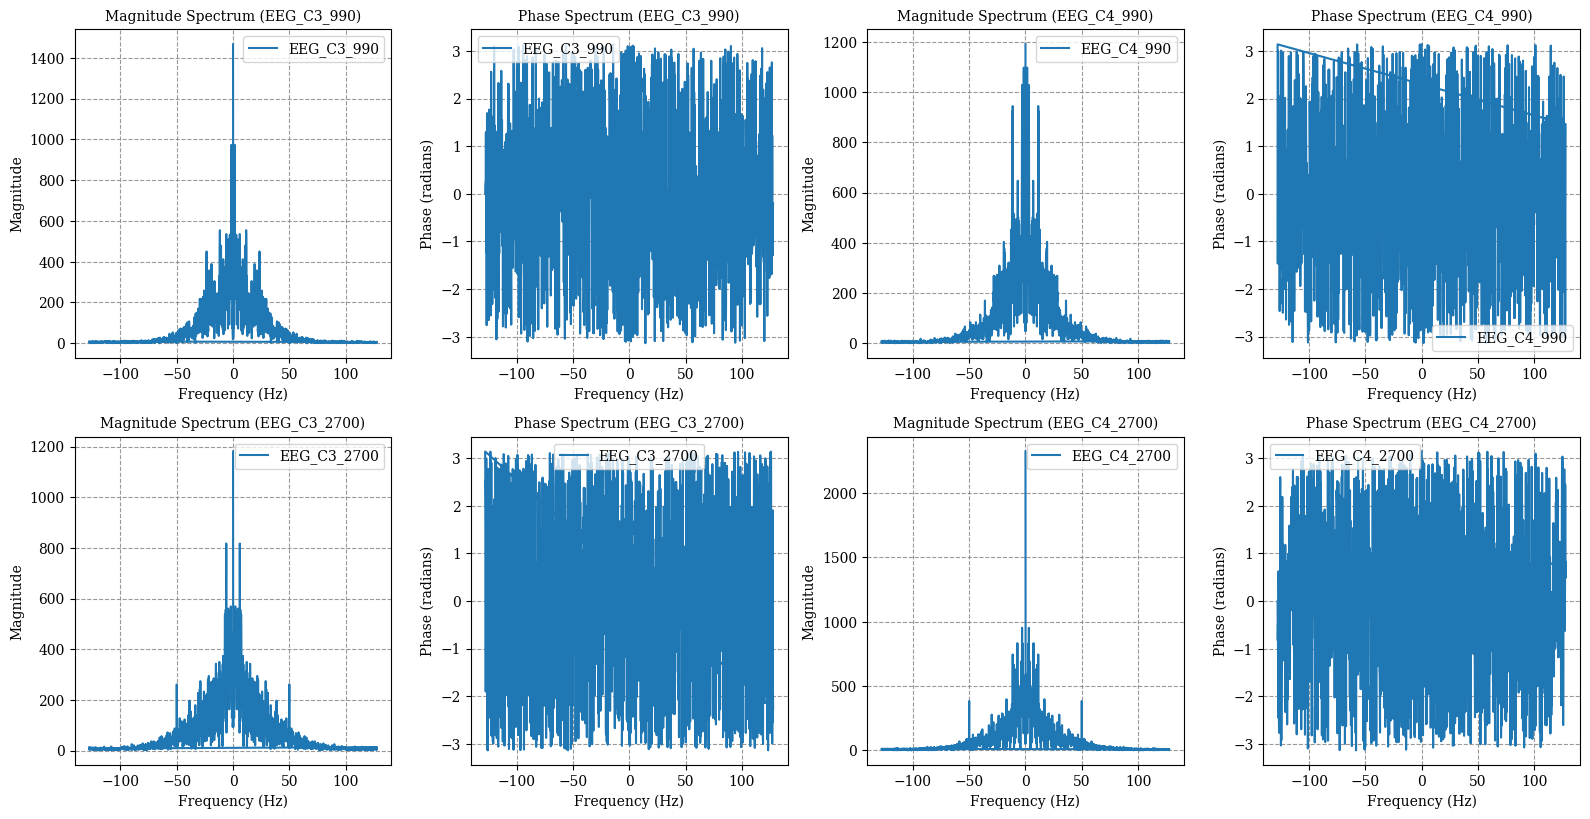

In [15]:
# Plot frequency domain representation
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(freq_axis, np.abs(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(freq_axis, np.angle(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Phase Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(freq_axis, np.abs(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(freq_axis, np.angle(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Phase Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(freq_axis, np.abs(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(freq_axis, np.angle(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Phase Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(freq_axis, np.abs(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(freq_axis, np.angle(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Phase Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


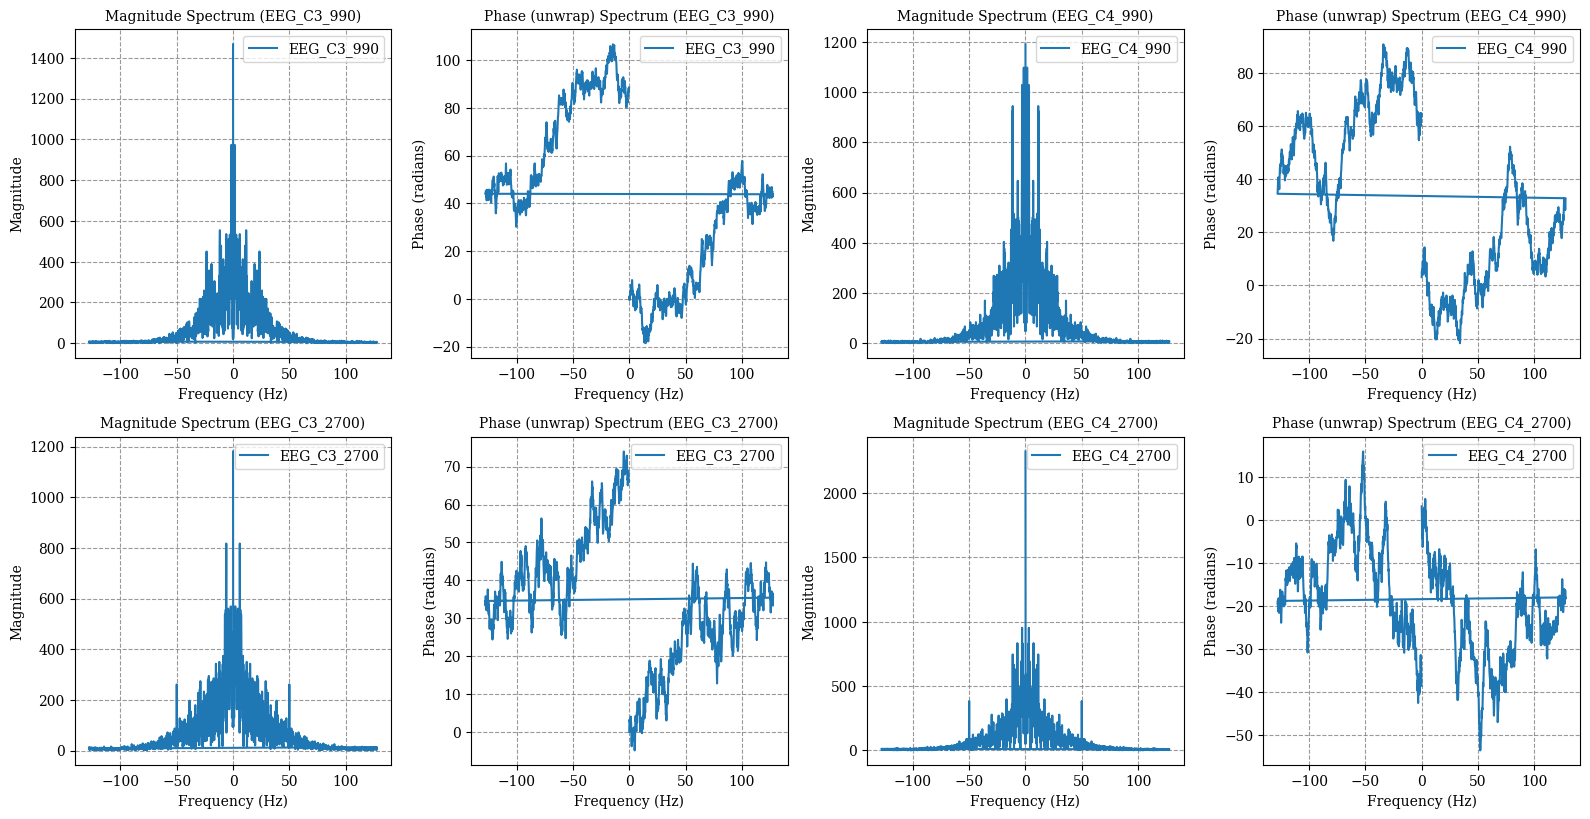

In [16]:
# Plot frequency domain representation
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(freq_axis, np.abs(fft_EEG_C3_990), label='EEG_C3_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C3_990)), label='EEG_C3_990')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C3_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(freq_axis, np.abs(fft_EEG_C4_990), label='EEG_C4_990')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C4_990)), label='EEG_C4_990')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C4_990'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(freq_axis, np.abs(fft_EEG_C3_2700), label='EEG_C3_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C3_2700)), label='EEG_C3_2700')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C3_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(freq_axis, np.abs(fft_EEG_C4_2700), label='EEG_C4_2700')
plt.title('Magnitude Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(freq_axis, np.unwrap(np.angle(fft_EEG_C4_2700)), label='EEG_C4_2700')
plt.title('Phase (unwrap) Spectrum ({})'.format('EEG_C4_2700'), fontsize=10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


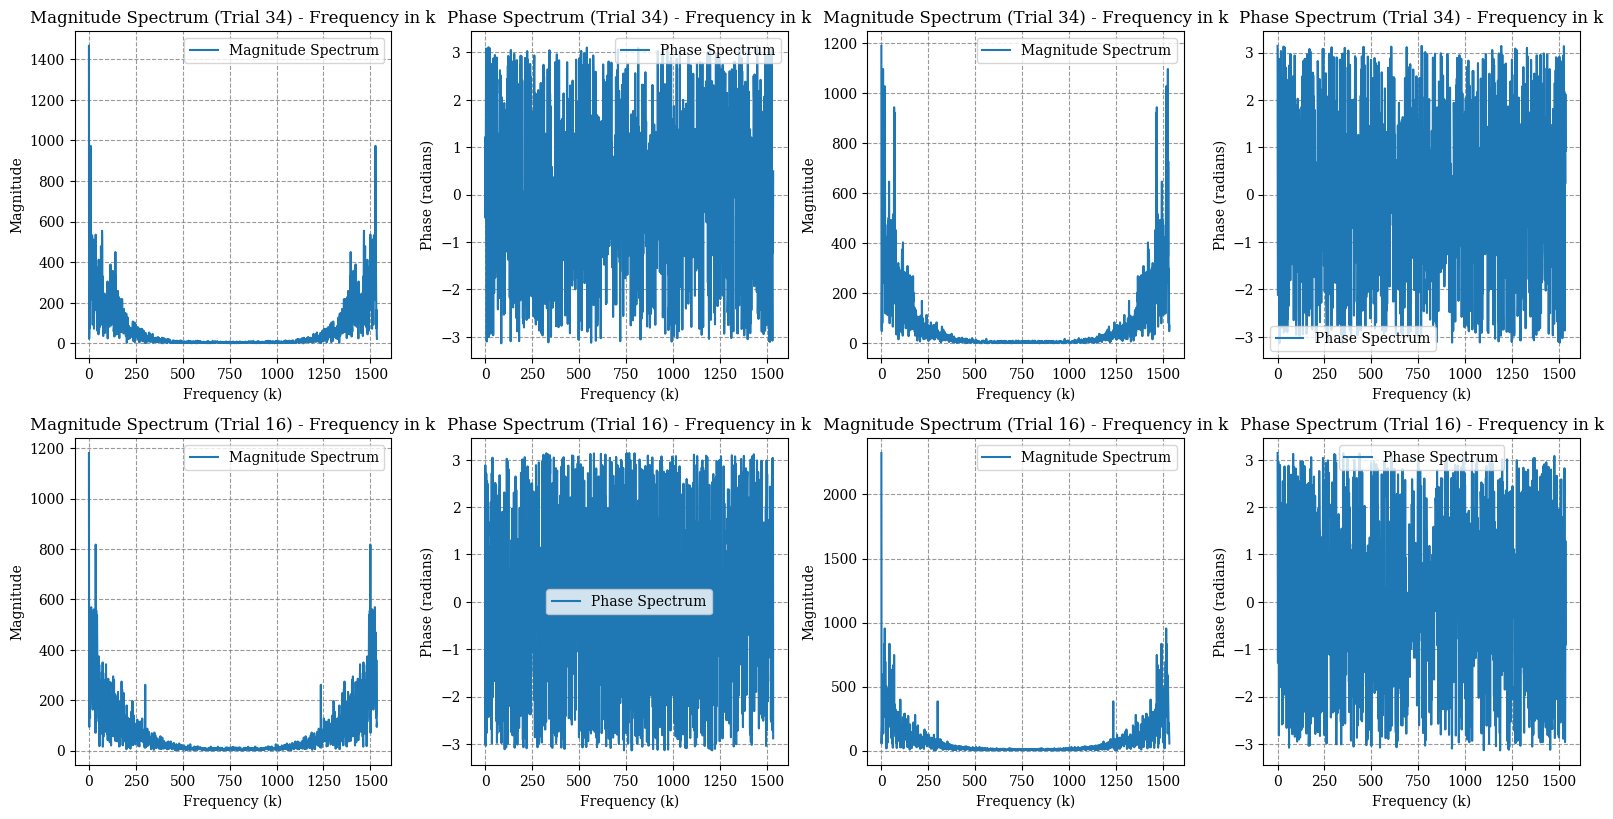

In [17]:
# Plot FFT domain representation with frequency axis in terms of sample indices (k)
plt.figure(figsize=(16, 16))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(4, 4, 1)
plt.plot(np.arange(len(fft_EEG_C3_990)), np.abs(fft_EEG_C3_990), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 2)
plt.plot(np.arange(len(fft_EEG_C3_990)), np.angle(fft_EEG_C3_990), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 990 meters (EEG_C4)
plt.subplot(4, 4, 3)
plt.plot(np.arange(len(fft_EEG_C4_990)), np.abs(fft_EEG_C4_990), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 4)
plt.plot(np.arange(len(fft_EEG_C4_990)), np.angle(fft_EEG_C4_990), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_990))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(4, 4, 5)
plt.plot(np.arange(len(fft_EEG_C3_2700)), np.abs(fft_EEG_C3_2700), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 6)
plt.plot(np.arange(len(fft_EEG_C3_2700)), np.angle(fft_EEG_C3_2700), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C4)
plt.subplot(4, 4, 7)
plt.plot(np.arange(len(fft_EEG_C4_2700)), np.abs(fft_EEG_C4_2700), label='Magnitude Spectrum')
plt.title('Magnitude Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(4, 4, 8)
plt.plot(np.arange(len(fft_EEG_C4_2700)), np.angle(fft_EEG_C4_2700), label='Phase Spectrum')
plt.title('Phase Spectrum (Trial {}) - Frequency in k'.format(random_index_2700))
plt.xlabel('Frequency (k)')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()


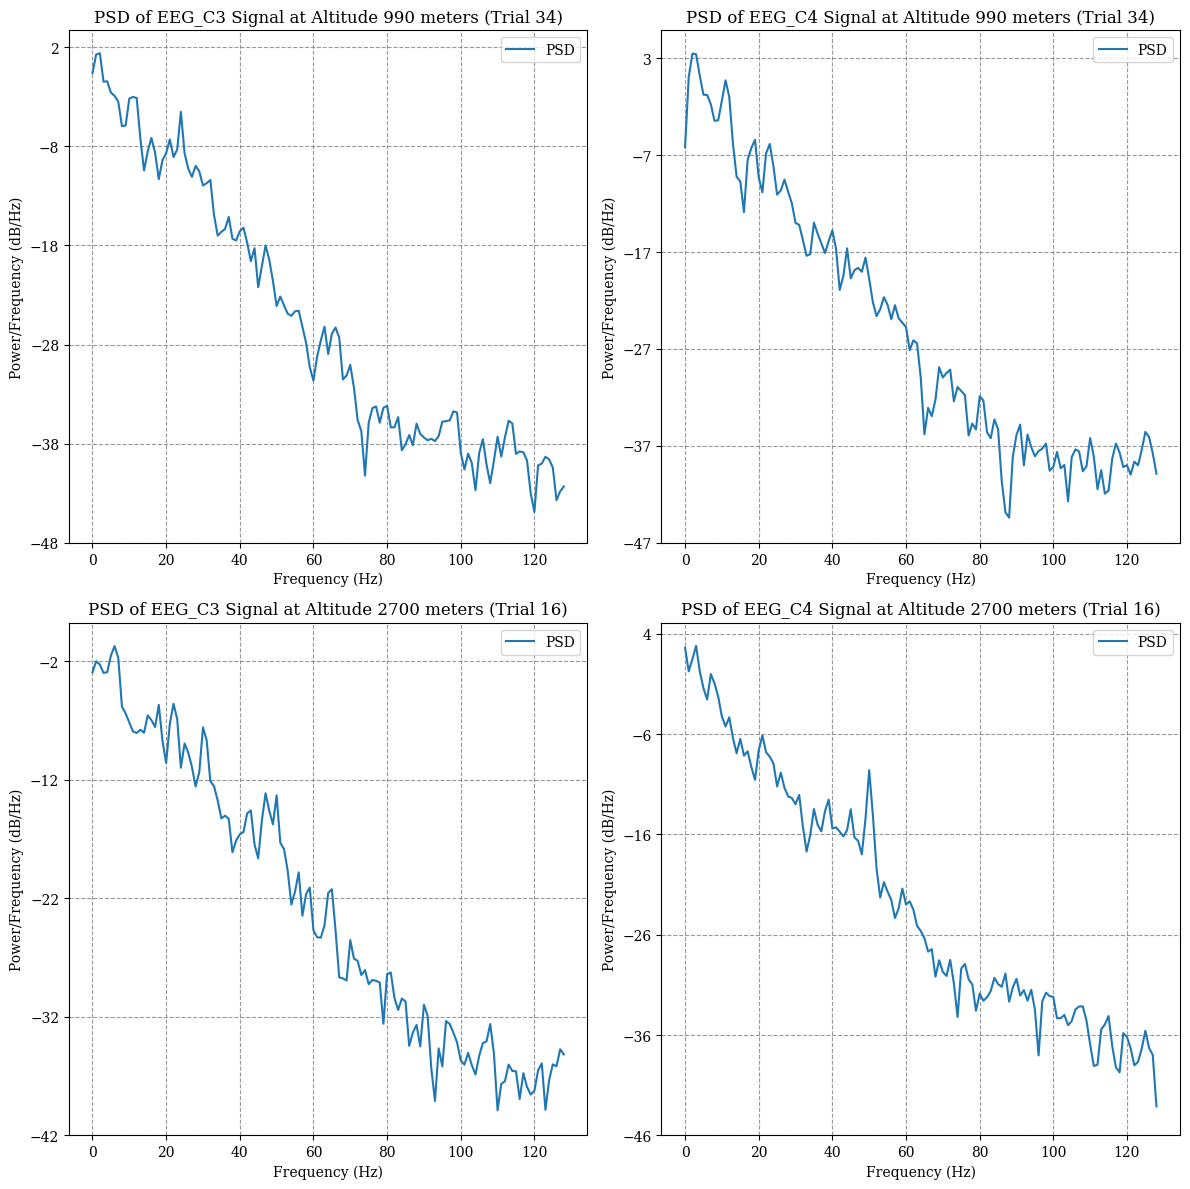

In [18]:
# Plot Power Spectral Density (PSD) with frequency axis in Hertz
plt.figure(figsize=(12, 12))

# EEG signal for altitude 990 meters (EEG_C3)
plt.subplot(2, 2, 1)
plt.psd(EEG_C3_990[random_index_990], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.subplot(2, 2, 2)
plt.psd(EEG_C4_990[random_index_990], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C4 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

# EEG signal for altitude 2700 meters (EEG_C3)
plt.subplot(2, 2, 3)
plt.psd(EEG_C3_2700[random_index_2700], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C3 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.subplot(2, 2, 4)
plt.psd(EEG_C4_2700[random_index_2700], Fs=Fs, label='PSD')
plt.title('PSD of EEG_C4 Signal at Altitude 2700 meters (Trial {})'.format(random_index_2700))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()

plt.tight_layout()
plt.show()


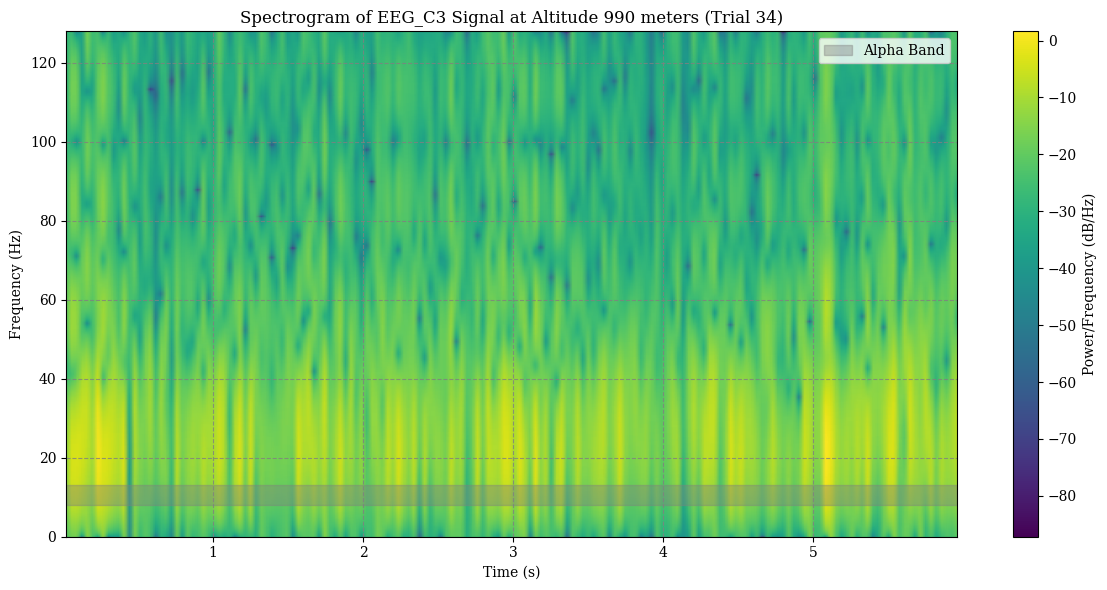

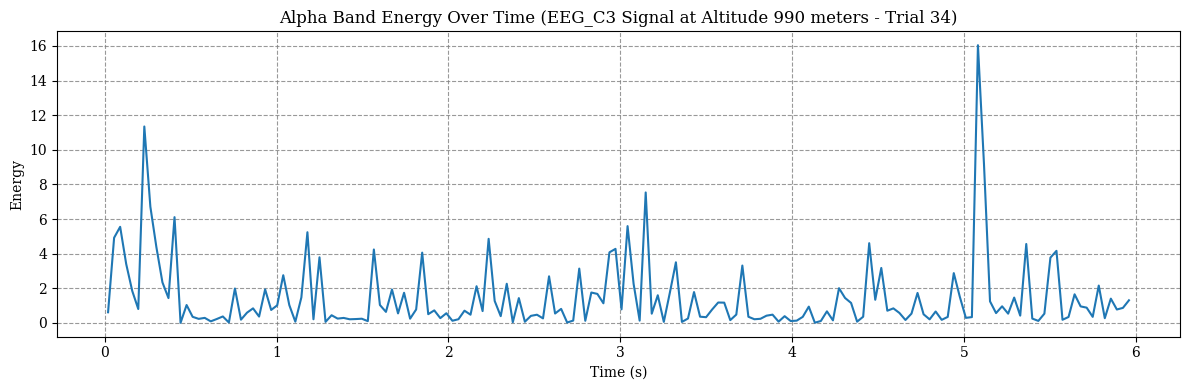

(513, 170)


In [62]:
from scipy.signal import spectrogram

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Compute the spectrogram for EEG_C3 signals at altitude 990 meters
frequencies, times, Sxx = spectrogram(EEG_C3_990[random_index_990], fs=Fs,nperseg=10 , nfft= 1024)

# Find the indices corresponding to the alpha band frequencies
alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]

# Compute the energy within the alpha band frequency range over time
alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)

# Plot the spectrogram and highlight the alpha band energy
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axhspan(alpha_band_freq_range[0], alpha_band_freq_range[1], color='gray', alpha=0.4, label='Alpha Band')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the alpha band energy over time
plt.figure(figsize=(12, 4))
plt.plot(times, alpha_band_energy)
plt.title('Alpha Band Energy Over Time (EEG_C3 Signal at Altitude 990 meters - Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()

print(np.shape(Sxx))

In [47]:
np.shape(EEG_C3_990[random_index_990])

(1536,)

In [40]:
contains_complex = np.iscomplex(Sxx)

# Print the result
print("Array contains complex numbers:", np.any(contains_complex))

Array contains complex numbers: False


In [41]:
from scipy.io import savemat

# Create a dictionary to store the variable
data_to_save = {'EEG_C3_990_random': EEG_C3_990[random_index_990]}

# Save the data to a .mat file
savemat('EEG_C3_990_random.mat', data_to_save)


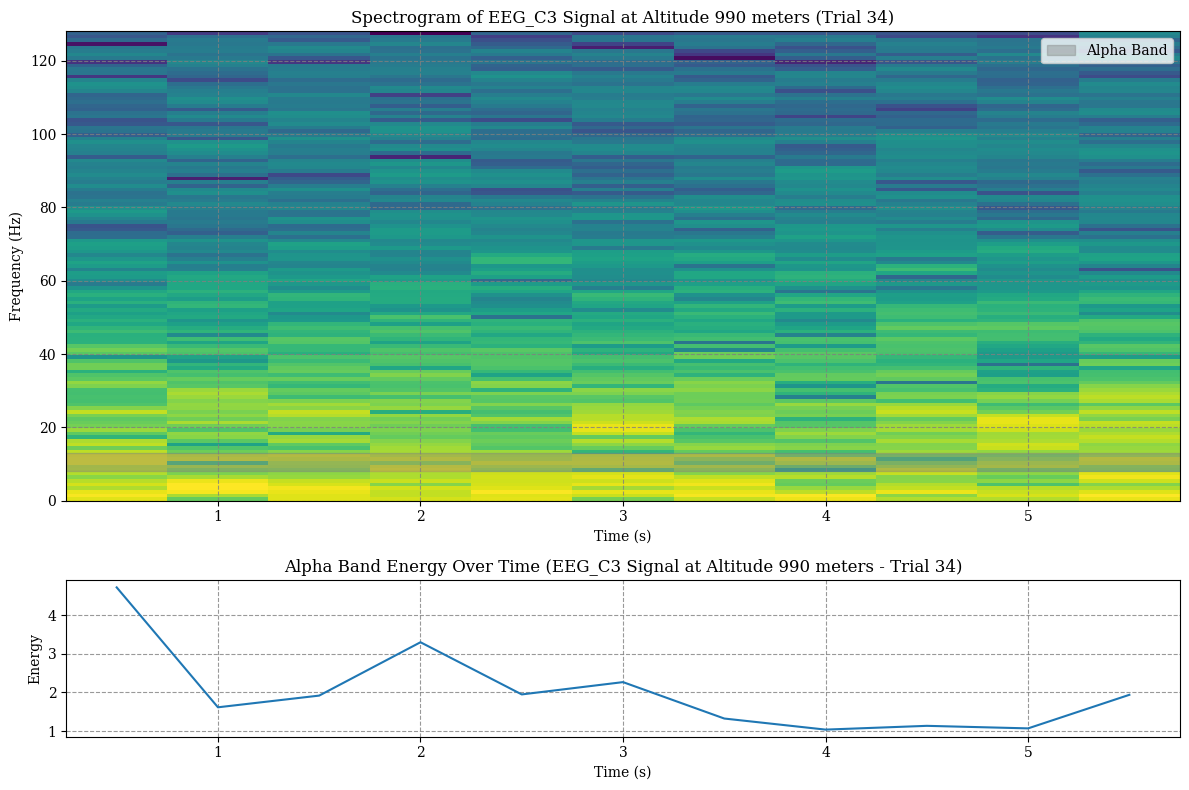

In [42]:
import matplotlib.pyplot as plt
from scipy.signal import spectrogram

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Compute the spectrogram for EEG_C3 signals at altitude 990 meters
frequencies, times, Sxx = spectrogram(EEG_C3_990[random_index_990], fs=256)

# Find the indices corresponding to the alpha band frequencies
alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]

# Compute the energy within the alpha band frequency range over time
alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)

# Create a figure and axes object
fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot the spectrogram
spec = ax[0].specgram(EEG_C3_990[random_index_990], Fs=256, NFFT=256, noverlap=128, cmap='viridis')
alpha_band_energy = np.sum(spec[0][alpha_band_indices, :], axis=0)
ax[0].set_title('Spectrogram of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].axhspan(alpha_band_freq_range[0], alpha_band_freq_range[1], color='gray', alpha=0.4, label='Alpha Band')
ax[0].legend()

# Plot the alpha band energy over time
ax[1].plot(spec[2], alpha_band_energy)
ax[1].set_title('Alpha Band Energy Over Time (EEG_C3 Signal at Altitude 990 meters - Trial {})'.format(random_index_990))
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Energy')

plt.tight_layout()
plt.show()


In [43]:
import numpy as np
from scipy.signal import welch

# EEG signal parameters
fs = 256  # Sampling frequency in Hz
nperseg = 256  # Length of each segment for Welch's method
alpha_band_freq_range = (8, 13)  # Alpha band frequency range in Hz

# Compute the PSD using Welch's method
frequencies, psd = welch(EEG_C3_990[random_index_990], fs=fs, nperseg=nperseg)

# Find the indices corresponding to the alpha band frequencies
alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]

# Integrate the PSD values within the alpha band frequency range
alpha_band_energy = np.trapz(psd[alpha_band_indices], frequencies[alpha_band_indices])

print("Energy of the alpha band:", alpha_band_energy)


Energy of the alpha band: 1.8287369619924343


In [32]:
psd

array([2.09185370e-01, 1.04805348e+00, 1.16254796e+00, 7.15603285e-01,
       7.14624685e-01, 5.52674551e-01, 4.64028735e-01, 3.78394082e-01,
       2.50918700e-01, 3.18336360e-01, 3.90283776e-01, 5.24034803e-01,
       3.98731605e-01, 1.43782135e-01, 1.36111150e-01, 1.71594821e-01,
       1.76098206e-01, 1.20343513e-01, 1.37333598e-01, 2.48767389e-01,
       2.87715211e-01, 3.03520732e-01, 2.23365703e-01, 1.92790561e-01,
       2.28714344e-01, 1.25766438e-01, 1.02011015e-01, 7.17902335e-02,
       8.91369200e-02, 9.72369906e-02, 6.54134166e-02, 4.20545463e-02,
       4.96249388e-02, 3.36993938e-02, 2.65733793e-02, 2.09261954e-02,
       1.54043768e-02, 2.04575005e-02, 1.58849513e-02, 1.63740895e-02,
       1.82499229e-02, 1.93146112e-02, 1.14698803e-02, 9.90030795e-03,
       1.37691152e-02, 6.20044051e-03, 1.00276205e-02, 1.39614771e-02,
       9.20949111e-03, 5.47804544e-03, 4.73232368e-03, 4.41182058e-03,
       3.37011237e-03, 3.31304155e-03, 4.80268175e-03, 3.81374650e-03,
      

In [21]:
np.shape(spec[0])

(129, 11)

In [22]:
# Check if there are any negative values in Sxx
any_negative = np.any(10 * np.log10(Sxx) < 0)
print("Are there any negative values in Sxx?", any_negative)

Are there any negative values in Sxx? True


In [23]:
np.max(abs((Sxx)) , axis= 0)

array([1.58592595, 3.1612334 , 1.61928158, 1.86508868, 1.89800434,
       1.15304478])

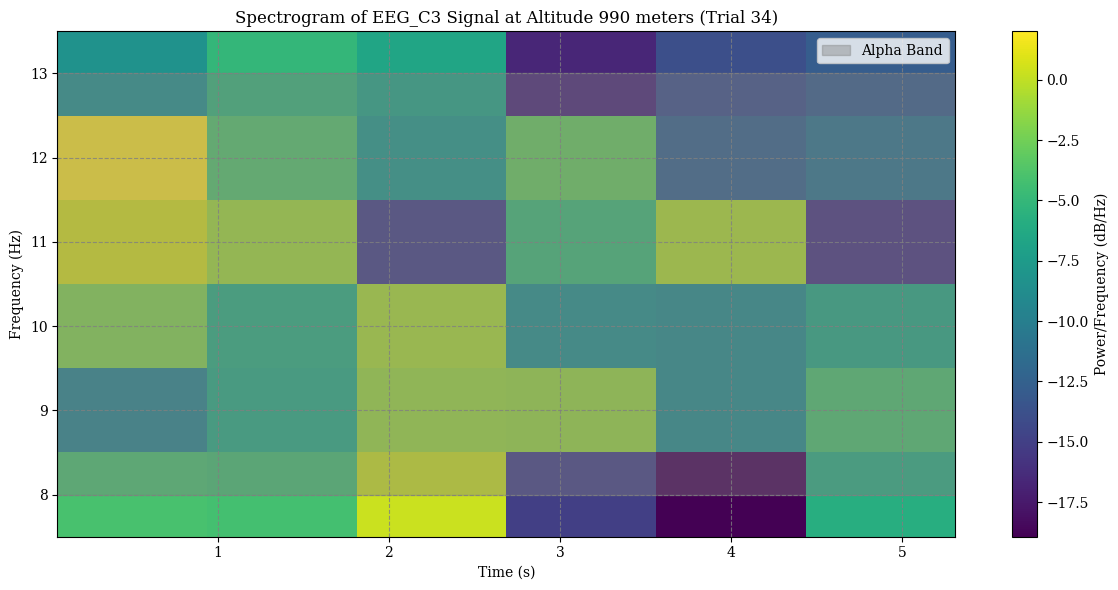

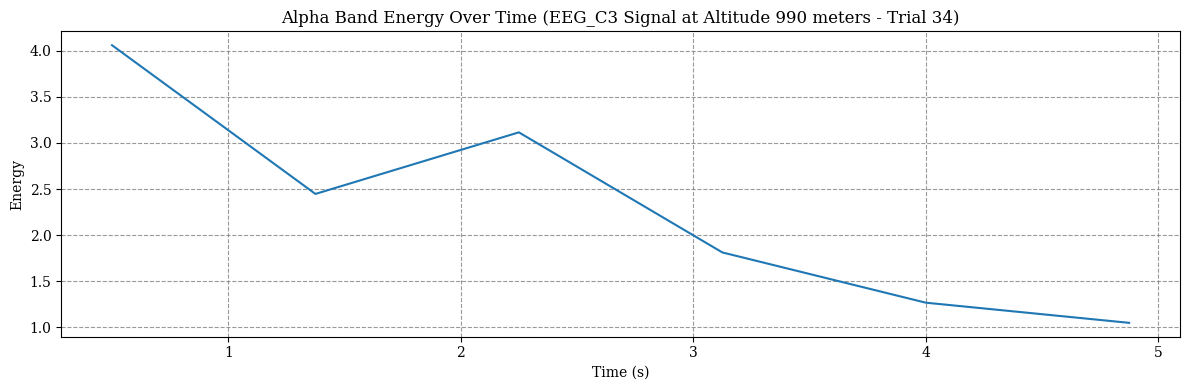

In [24]:
from scipy.signal import spectrogram

# Define the frequency range for the alpha band
alpha_band_freq_range = (8, 13)

# Compute the spectrogram for EEG_C3 signals at altitude 990 meters
frequencies, times, Sxx = spectrogram(EEG_C3_990[random_index_990], fs=256)

# Find the indices corresponding to the alpha band frequencies
alpha_band_indices = np.where((frequencies >= alpha_band_freq_range[0]) & (frequencies <= alpha_band_freq_range[1]))[0]

# Compute the energy within the alpha band frequency range over time
alpha_band_energy = np.sum(Sxx[alpha_band_indices, :], axis=0)

# Plot the spectrogram and highlight the alpha band energy
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies[alpha_band_indices], 10 * np.log10(abs(Sxx[alpha_band_indices, :])), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram of EEG_C3 Signal at Altitude 990 meters (Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.axhspan(alpha_band_freq_range[0], alpha_band_freq_range[1], color='gray', alpha=0.4, label='Alpha Band')
plt.legend()
plt.tight_layout()
plt.show()

# Plot the alpha band energy over time
plt.figure(figsize=(12, 4))
plt.plot(times, alpha_band_energy)
plt.title('Alpha Band Energy Over Time (EEG_C3 Signal at Altitude 990 meters - Trial {})'.format(random_index_990))
plt.xlabel('Time (s)')
plt.ylabel('Energy')
plt.tight_layout()
plt.show()
